<a href="https://colab.research.google.com/github/aldonat/SC-MachineLearning-dan-DeepLearning/blob/main/Cross_Validation%2C_Bootstrapping%2C_Learning_Curves_%26_Model_Optimization_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Menampilkan Learning Curve

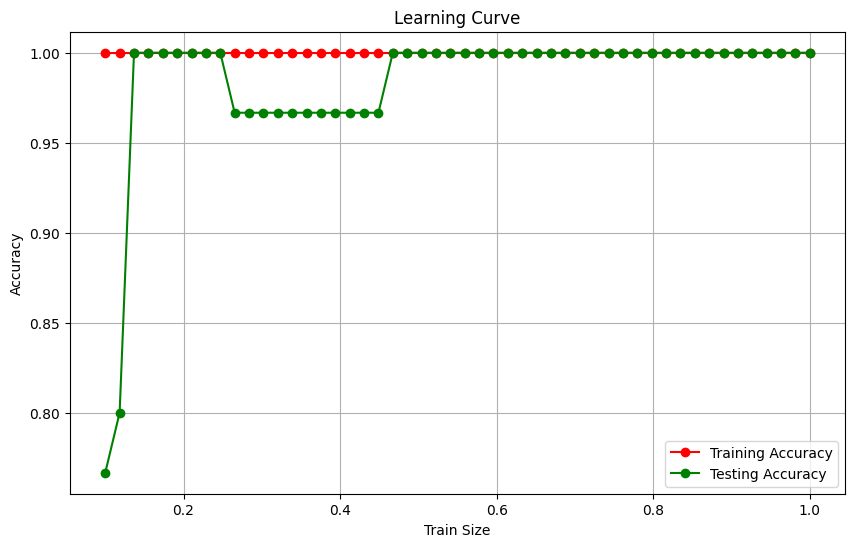

In [ ]:
#Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Load the Iris dataset
iris = load_iris()
X,y =iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Used to devide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clf = RandomForestClassifier(n_estimators= 100, random_state=42)

for train_size in train_sizes:
  num_samples = int(train_size * len(X_train))
  X_subset = X_train[:num_samples]
  y_subset = y_train[:num_samples]

  clf.fit(X_subset, y_subset)

  y_pred_train = clf.predict(X_subset)
  acc_train = accuracy_score(y_subset, y_pred_train)
  learning_curve_train.append(acc_train)

  y_pred_test = clf.predict(X_test)
  acc_test = accuracy_score(y_test, y_pred_test)
  learning_curve_test.append(acc_test)

plt.figure(figsize=(10,6))
plt.title('Learning Curve')
plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-',color='r',label='Training Accuracy')
plt.plot(train_sizes, learning_curve_test, 'o-',color='g',label='Testing Accuracy')
plt.legend(loc='best')
plt.show()


#Implementasi Cross Validation pada Model

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier

iris= load_iris()
clf = DecisionTreeClassifier(random_state=0)

cv_score = cross_val_score(clf, iris.data, iris.target, cv=10)
print("Cross Validation Score")
print(cv_score)

#predict using cross validation
y_pred = cross_val_predict(clf, X,y, cv=3)

Cross Validation Score
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


#Implement Learning Curve dengan Cross Validation




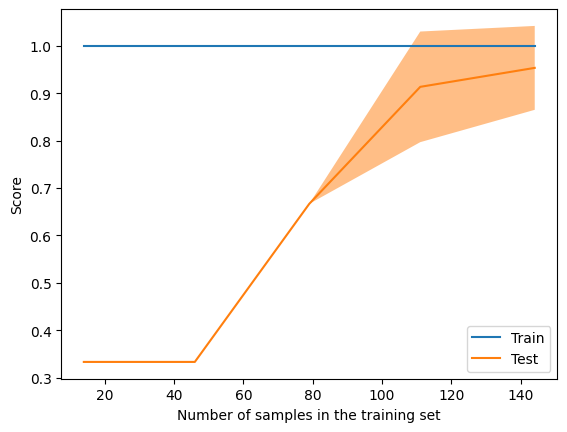

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.tree import DecisionTreeClassifier

X,y = load_iris(return_X_y=True)
tree = DecisionTreeClassifier(random_state=32)
train_sizes ,train_scores, test_score = learning_curve(
    tree,X,y,cv=25)
display =LearningCurveDisplay(train_sizes = train_sizes,
                              train_scores= train_scores, test_scores=test_score,score_name='Score')
display.plot()
plt.show()

#Implementasi Boostrap

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Load the Iris dataset
iris = load_iris()
X,y =iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators= 100, random_state=42)

#Implement Boostrapping
n_bootstraps = 10
bootstrap_accuracies = []

for _ in range(n_bootstraps):
  boostrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
  X_bootstrap = X_train[boostrap_indices]
  y_bootstrap = y_train[boostrap_indices]

  clf.fit(X_bootstrap, y_bootstrap)

  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  bootstrap_accuracies.append(accuracy)

#print the result
print("Bootstrap Accuracies:", bootstrap_accuracies)
print("Mean Accuracy:", np.mean(bootstrap_accuracies))
print("Standard Deviation:", np.std(bootstrap_accuracies))

Bootstrap Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy: 1.0
Standard Deviation: 0.0


#Hyperparameter Tuning Decisoon Tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.tree import DecisionTreeClassifier
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train, sample_weight=None, check_input=True)
score = clf.score(X_test, y_test)

clf_max_depth= DecisionTreeClassifier(max_depth=2, random_state=0)
clf_max_depth.fit(X_train, y_train, sample_weight=None, check_input=True)
score_max_depth = clf_max_depth.score(X_test, y_test)

print("Score default : ")
print(score)
print("Score max_depth : ")
print(score_max_depth)

Score default : 
1.0
Score max_depth : 
0.9666666666666667


#Implementasi Ensampe Model

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier

X,y = make_blobs(n_samples=1000, n_features=10, centers=100, random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X,y, cv=5)
print("Decision Tree Classifier %f" % scores.mean())

clf_forest = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores_forest = cross_val_score(clf_forest, X,y, cv=5)
print("Random Forest Score %f" % scores_forest.mean())

clf_ext = ExtraTreesRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores_ext = cross_val_score(clf_ext, X,y, cv=5)
print("Extra Trees Score %f" % scores_ext.mean())

Decision Tree Classifier 0.886000
Random Forest Score 0.996000
Extra Trees Score 0.939950
